<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [1]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 61.4 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp37-cp37m-linux_x86_64.whl size=1159121 sha256=7f3cdb9cd6c88aca339dbda6b66df4f3bc431ca3aff218f4f43e5ff83e68459f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/03/71/13/010faf12246f72dc76b4150e6e599d13a85b4435e06fb9e51f
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.24
    Uninstalling SQLAlchemy-1.3.24:
      Successfully uninstalled SQLAlchemy-1.3.24


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [4]:
!pip install -q pandas==1.1.5

In [5]:
%sql sqlite:///my_data1.db

'Connected: @my_data1.db'

In [6]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  both result in 0.1234 being formatted as 0.12.


**Note:This below code is added to remove blank rows from table**


In [7]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

Using bullet point format, summarize the SQL queries you performed
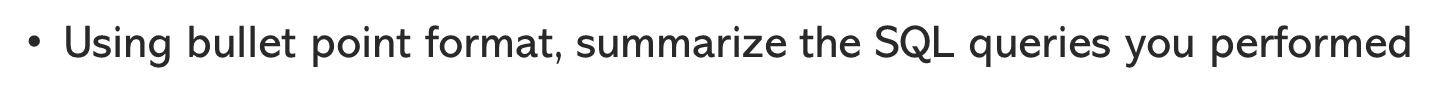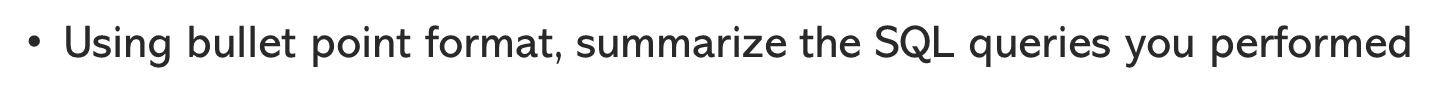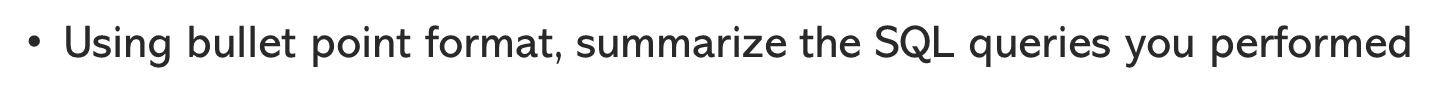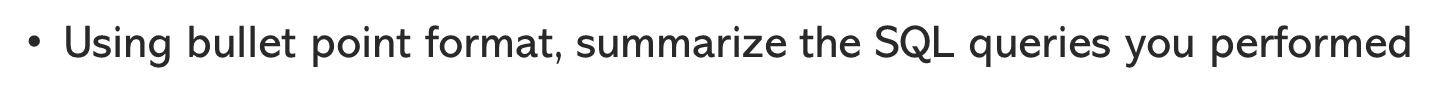## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [9]:
%sql SELECT DISTINCT "LaunchSite" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


"""LaunchSite"""
LaunchSite



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [10]:
%sql SELECT * FROM SPACEXTABLE WHERE "LaunchSite" LIKE 'CCA%' LIMIT 5;


 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [11]:
%sql SELECT SUM("PayloadMass") AS "TotalPayloadMass" FROM SPACEXTABLE WHERE "Customer" = 'NASA (CRS)';


 * sqlite:///my_data1.db
Done.


TotalPayloadMass
0.0


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [12]:
%sql SELECT AVG("PayloadMass") AS "AveragePayloadMass" FROM SPACEXTABLE WHERE "BoosterVersion" = 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


AveragePayloadMass
None


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [13]:
%sql SELECT MIN("Date") AS "FirstSuccessfulLandingDate" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (ground pad)';


 * sqlite:///my_data1.db
Done.


FirstSuccessfulLandingDate
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [14]:
%sql SELECT "BoosterVersion" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (drone ship)' AND "PayloadMass" BETWEEN 4000 AND 6000;


 * sqlite:///my_data1.db
Done.


"""BoosterVersion"""


### Task 7




##### List the total number of successful and failure mission outcomes


In [15]:
%sql SELECT "MissionOutcome", COUNT(*) AS "TotalMissions" FROM SPACEXTABLE GROUP BY "MissionOutcome";


 * sqlite:///my_data1.db
Done.


"""MissionOutcome""",TotalMissions
MissionOutcome,101


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [16]:
%sql SELECT "BoosterVersion" FROM SPACEXTABLE WHERE "PayloadMass" = (SELECT MAX("PayloadMass") FROM SPACEXTABLE);


 * sqlite:///my_data1.db
Done.


"""BoosterVersion"""
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion
BoosterVersion


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [18]:
%%sql
SELECT substr("Date", 6, 2) AS "Month", "Landing_Outcome", "BoosterVersion", "LaunchSite"
FROM SPACEXTABLE
WHERE substr("Date", 0, 5) = '2015' AND "Landing_Outcome" LIKE '%Failure%' AND "Landing_Location" = 'Drone Ship';



 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,"""BoosterVersion""","""LaunchSite"""


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [19]:
%%sql
SELECT "Landing_Outcome", COUNT(*) AS "Count"
FROM SPACEXTABLE
WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY "Count" DESC;


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
